In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as colors

C:\Users\L0512821\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("xeek_train_subset.csv", sep=';')

In [3]:
df.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
count,122397.000000,122386.000000,1.223860e+05,122386.000000,118954.000000,25683.000000,112580.000000,122386.000000,112869.000000,122397.000000,...,91150.000000,72871.000000,43104.000000,112267.000000,0.0,15181.000000,64221.000000,8894.000000,122397.000000,122377.000000
mean,2209.918995,495031.999867,6.641592e+06,-2175.312134,12.878327,22.741097,3.428125,23.664096,2.325457,72.125599,...,36.002535,238.065539,0.244774,0.016727,NaN,3.089212,35.830181,153.622474,63642.854400,1.122090
std,830.939854,34686.859130,1.486340e+05,825.338356,3.195471,171.547958,31.791279,96.279477,0.223338,35.301383,...,42.339898,93.206098,0.771045,0.098004,NaN,9.965275,39.459786,501.615305,13772.405436,0.370172
min,443.379997,433906.750000,6.458300e+06,-4286.082520,8.025192,0.119106,0.158995,0.037163,1.127937,1.132300,...,0.000000,86.628220,-5.500000,-1.453413,NaN,0.132760,0.115860,0.120551,30000.000000,1.000000
25%,1589.516002,452405.968750,6.495507e+06,-2738.910767,12.005362,0.776829,0.850705,0.870180,2.176974,49.684471,...,14.561207,158.404366,0.009263,-0.005220,NaN,0.901667,14.891059,0.577777,65000.000000,1.000000
50%,2193.864800,515574.437500,6.740118e+06,-2156.599853,12.453753,1.287566,1.337297,1.381397,2.370102,74.382141,...,24.080531,213.502136,0.172958,0.015108,NaN,1.474687,24.024317,1.204135,65000.000000,1.000000
75%,2791.376800,521504.781250,6.771839e+06,-1563.775421,13.379490,3.672304,2.433031,2.923758,2.499295,94.324402,...,39.772709,324.204788,0.426309,0.052338,NaN,3.143365,39.383507,2.412848,65030.000000,1.000000
max,4319.790800,536112.500000,6.853475e+06,-420.046387,23.093700,1999.717041,1573.656006,1755.531006,3.353153,1141.292114,...,694.254578,562.037109,8.380077,0.675181,NaN,621.158386,439.485748,2030.926148,99000.000000,3.000000


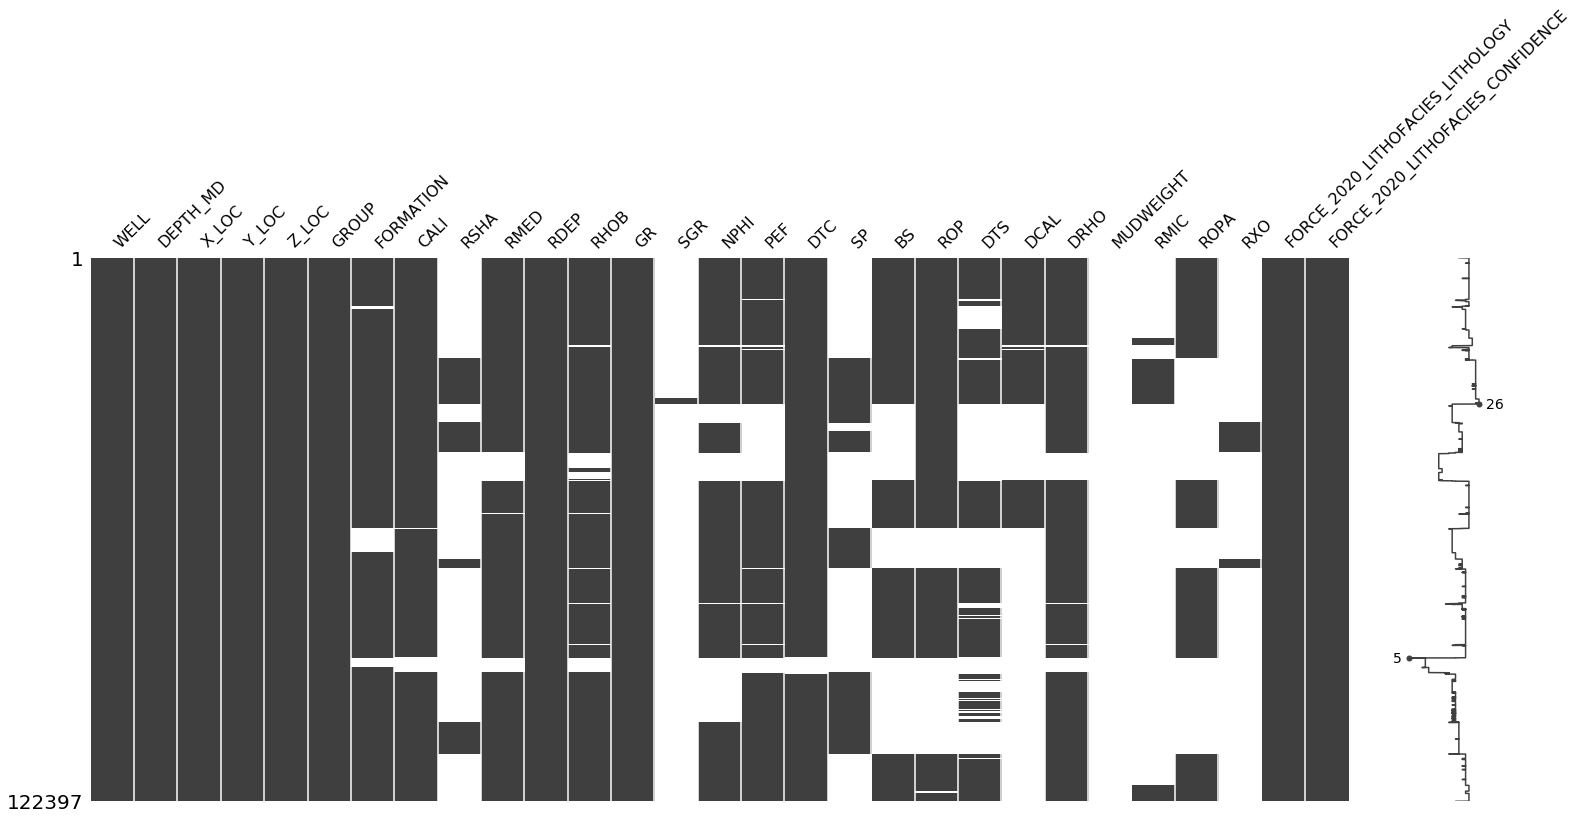

In [4]:
import missingno as mo
%matplotlib inline
mo.matrix(df)

In [5]:
data = df[["RDEP", "RHOB", "GR", "DTC", "NPHI", ]].copy()

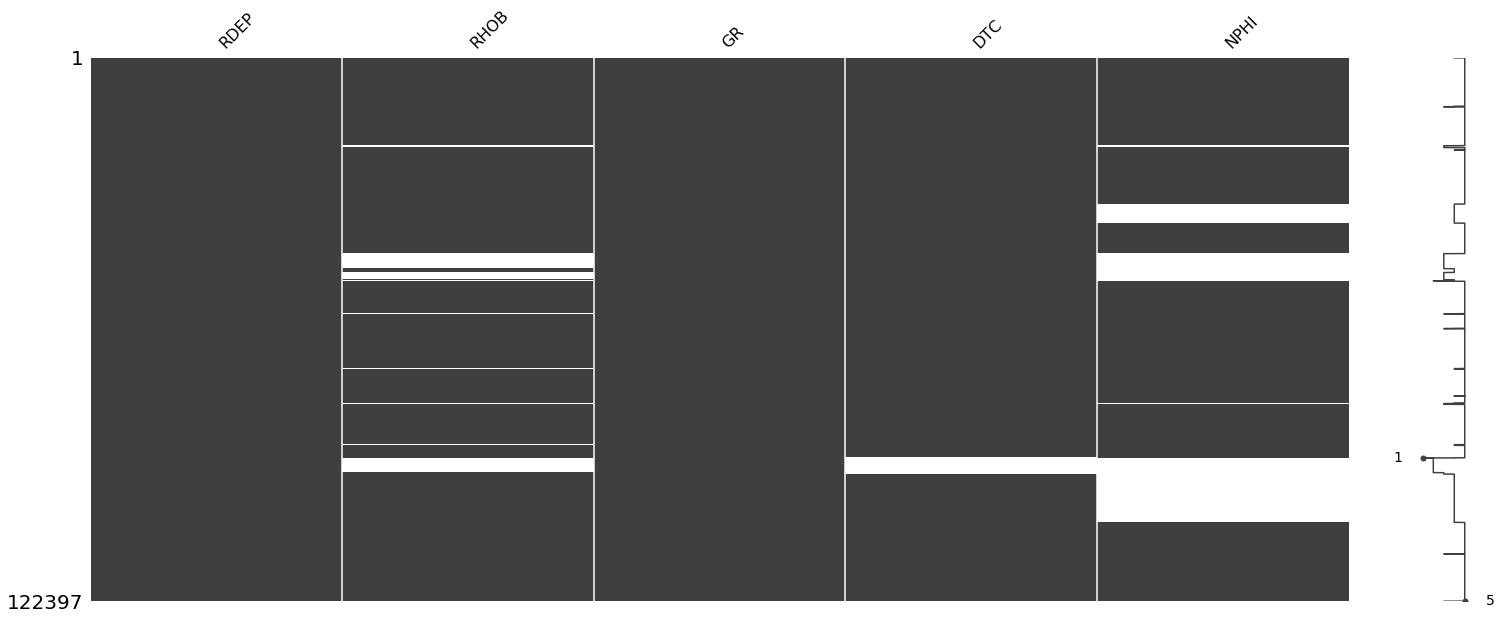

In [6]:
mo.matrix(data)

In [7]:
data.head()

,RDEP,RHOB,GR,DTC,NPHI
0,0.878615,NaN,103.451515,147.043427,0.439925
1,0.874237,NaN,94.124893,145.426468,0.504055
2,0.869858,NaN,93.586487,145.295105,0.512960
3,0.865479,NaN,91.113373,143.657593,0.500070
4,0.863804,NaN,100.228333,142.838440,0.277670


In [8]:
lithology_numbers = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}
df.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY':'FACIES'}, inplace=True)
df['LITH'] = df['FACIES'].map(lithology_numbers)

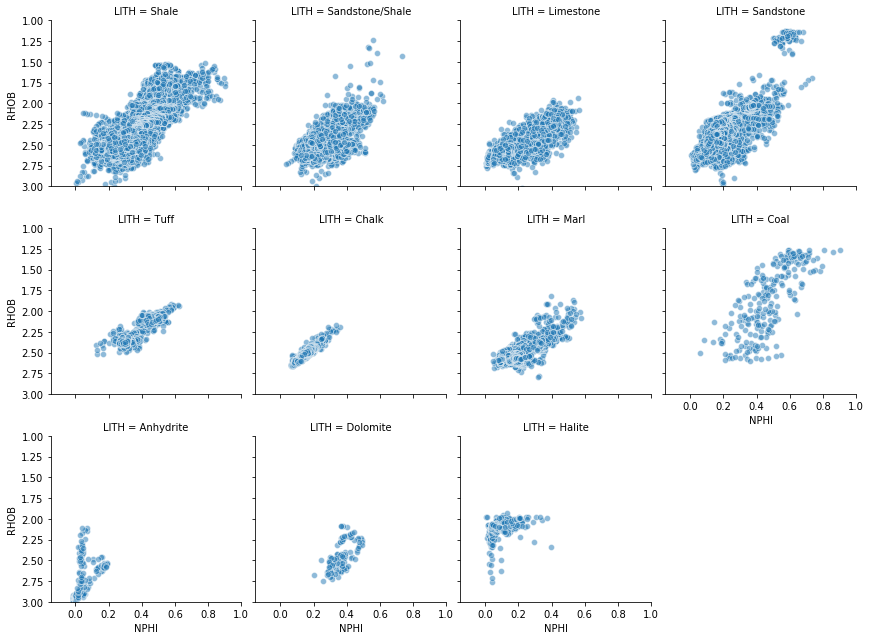

In [9]:
g = sns.FacetGrid(df, col='LITH', col_wrap=4)
g.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.5)
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))

In [10]:
data.dropna(inplace=True)
data.head()

,RDEP,RHOB,GR,DTC,NPHI
54,0.841768,2.052875,116.596664,147.079727,0.580942
55,0.835892,2.103997,117.188751,149.681824,0.588395
56,0.833300,2.135201,119.035187,151.130005,0.490395
57,0.829209,2.142983,114.921494,148.035446,0.392217
58,0.812787,2.148073,113.003197,146.129105,0.390906


In [11]:
data.reset_index(inplace=True)
data

,index,RDEP,RHOB,GR,DTC,NPHI
0,54,0.841768,2.052875,116.596664,147.079727,0.580942
1,55,0.835892,2.103997,117.188751,149.681824,0.588395
2,56,0.833300,2.135201,119.035187,151.130005,0.490395
3,57,0.829209,2.142983,114.921494,148.035446,0.392217
4,58,0.812787,2.148073,113.003197,146.129105,0.390906
...,...,...,...,...,...,...
95834,122373,1.658935,2.364000,73.434174,77.891953,0.162661
95835,122374,1.671857,2.363551,73.363243,76.698967,0.162905
95836,122375,1.686821,2.363479,70.562103,75.748085,0.162685
95837,122376,1.663354,2.364090,67.006660,76.182335,0.160029


In [12]:
data.drop('index', inplace=True, axis =1)
data

,RDEP,RHOB,GR,DTC,NPHI
0,0.841768,2.052875,116.596664,147.079727,0.580942
1,0.835892,2.103997,117.188751,149.681824,0.588395
2,0.833300,2.135201,119.035187,151.130005,0.490395
3,0.829209,2.142983,114.921494,148.035446,0.392217
4,0.812787,2.148073,113.003197,146.129105,0.390906
...,...,...,...,...,...
95834,1.658935,2.364000,73.434174,77.891953,0.162661
95835,1.671857,2.363551,73.363243,76.698967,0.162905
95836,1.686821,2.363479,70.562103,75.748085,0.162685
95837,1.663354,2.364090,67.006660,76.182335,0.160029


In [13]:
feature_cols_ = data.columns[:-1]
feature_cols_

Index(['RDEP', 'RHOB', 'GR', 'DTC'], dtype='object')

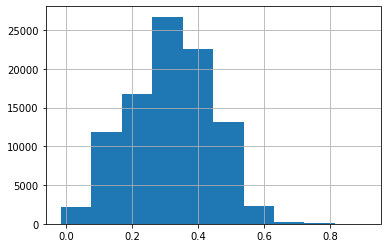

In [14]:
data['NPHI'].hist()

In [15]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [16]:
for column in feature_cols_:
    data[column] = mm.fit_transform(data[[column]])

In [17]:
data

,RDEP,RHOB,GR,DTC,NPHI
0,0.000376,0.415662,0.101270,0.756887,0.580942
1,0.000373,0.438636,0.101790,0.776819,0.588395
2,0.000372,0.452659,0.103409,0.787912,0.490395
3,0.000369,0.456156,0.099801,0.764208,0.392217
4,0.000360,0.458444,0.098119,0.749605,0.390906
...,...,...,...,...,...
95834,0.000842,0.555480,0.063414,0.226913,0.162661
95835,0.000849,0.555278,0.063352,0.217775,0.162905
95836,0.000858,0.555246,0.060895,0.210492,0.162685
95837,0.000845,0.555520,0.057776,0.213818,0.160029


In [18]:
np.array(data['NPHI'])

array([0.58094186, 0.58839464, 0.49039495, ..., 0.1626851 , 0.16002867,
       0.15691598])

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[feature_cols_], data['NPHI'], test_size=0.3, random_state=72018)

In [20]:
X_test

,RDEP,RHOB,GR,DTC
35525,0.001531,0.631898,0.038272,0.262640
94355,0.007172,0.638384,0.088934,0.215252
93526,0.006863,0.620481,0.085959,0.293033
81470,0.003057,0.665072,0.082687,0.318018
95667,0.002836,0.602544,0.101809,0.288849
...,...,...,...,...
20744,0.002116,0.618387,0.089280,0.174114
16145,0.000624,0.527314,0.026233,0.351670
95124,0.003375,0.649537,0.099936,0.299515
86385,0.000386,0.470708,0.038806,0.795717


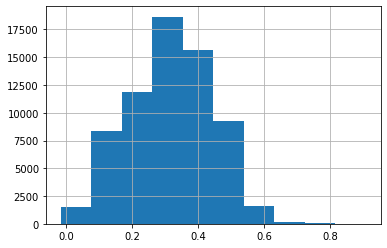

In [21]:
y_train.hist()

In [22]:
#linear regression
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.coef_)

[-0.1944518  -0.28947694  0.95621082  0.35415121]


In [24]:
from sklearn.metrics import r2_score
linear_score = r2_score(y_test, lr.predict(X_test))
linear_score

0.7793264676401669

In [25]:
data['NPHI_LinearReg'] = lr.predict(data[feature_cols_])
data

,RDEP,RHOB,GR,DTC,NPHI,NPHI_LinearReg
0,0.000376,0.415662,0.101270,0.756887,0.580942,0.492263
1,0.000373,0.438636,0.101790,0.776819,0.588395,0.493169
2,0.000372,0.452659,0.103409,0.787912,0.490395,0.494587
3,0.000369,0.456156,0.099801,0.764208,0.392217,0.481730
4,0.000360,0.458444,0.098119,0.749605,0.390906,0.474290
...,...,...,...,...,...,...
95834,0.000842,0.555480,0.063414,0.226913,0.162661,0.227809
95835,0.000849,0.555278,0.063352,0.217775,0.162905,0.224570
95836,0.000858,0.555246,0.060895,0.210492,0.162685,0.219649
95837,0.000845,0.555520,0.057776,0.213818,0.160029,0.217768


In [26]:
#ridge using CV
from sklearn.linear_model import RidgeCV

alphas = [1e-5, 1e-4, 0.001, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, y_train)

ridgeCV_score = r2_score(y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_score)

0.3 0.7792994688469134


In [27]:
data['NPHI_Ridge'] = ridgeCV.predict(data[feature_cols_])
data

,RDEP,RHOB,GR,DTC,NPHI,NPHI_LinearReg,NPHI_Ridge
0,0.000376,0.415662,0.101270,0.756887,0.580942,0.492263,0.492072
1,0.000373,0.438636,0.101790,0.776819,0.588395,0.493169,0.493005
2,0.000372,0.452659,0.103409,0.787912,0.490395,0.494587,0.494432
3,0.000369,0.456156,0.099801,0.764208,0.392217,0.481730,0.481587
4,0.000360,0.458444,0.098119,0.749605,0.390906,0.474290,0.474152
...,...,...,...,...,...,...,...
95834,0.000842,0.555480,0.063414,0.226913,0.162661,0.227809,0.227726
95835,0.000849,0.555278,0.063352,0.217775,0.162905,0.224570,0.224484
95836,0.000858,0.555246,0.060895,0.210492,0.162685,0.219649,0.219572
95837,0.000845,0.555520,0.057776,0.213818,0.160029,0.217768,0.217710


In [28]:
from sklearn.linear_model import LassoCV

lassoCV = LassoCV(alphas=alphas,
                  max_iter=5e4,
                  cv=4).fit(X_train, y_train)

lassoCV_score = r2_score(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_score)  # Lasso is slower

1e-05 0.779240491687904


In [29]:
data['NPHI_Lasso'] = lassoCV.predict(data[feature_cols_])
data

,RDEP,RHOB,GR,DTC,NPHI,NPHI_LinearReg,NPHI_Ridge,NPHI_Lasso
0,0.000376,0.415662,0.101270,0.756887,0.580942,0.492263,0.492072,0.491736
1,0.000373,0.438636,0.101790,0.776819,0.588395,0.493169,0.493005,0.492751
2,0.000372,0.452659,0.103409,0.787912,0.490395,0.494587,0.494432,0.494219
3,0.000369,0.456156,0.099801,0.764208,0.392217,0.481730,0.481587,0.481383
4,0.000360,0.458444,0.098119,0.749605,0.390906,0.474290,0.474152,0.473949
...,...,...,...,...,...,...,...,...
95834,0.000842,0.555480,0.063414,0.226913,0.162661,0.227809,0.227726,0.227469
95835,0.000849,0.555278,0.063352,0.217775,0.162905,0.224570,0.224484,0.224217
95836,0.000858,0.555246,0.060895,0.210492,0.162685,0.219649,0.219572,0.219315
95837,0.000845,0.555520,0.057776,0.213818,0.160029,0.217768,0.217710,0.217478


C:\Users\L0512821\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\L0512821\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\L0512821\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


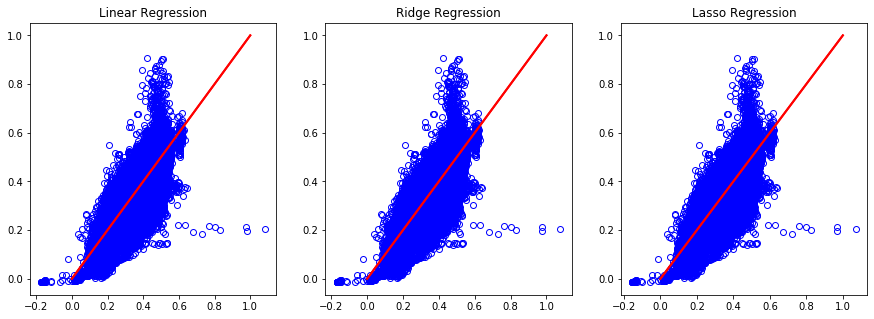

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))

ax1.set_title('Linear Regression')
ax1.plot(data["NPHI_LinearReg"], data['NPHI'], color = "blue", marker='o', fillstyle ='none', ls='', label = 'Linear Reg')
ax1.plot(np.array([[0,0], [1,1]]), color='red', linewidth = '2')

ax2.set_title('Ridge Regression')
ax2.plot(data["NPHI_Ridge"], data['NPHI'], color = "blue", marker='o', fillstyle ='none', ls='', label = 'Ridge Reg')
ax2.plot(np.array([[0,0], [1,1]]), color='red', linewidth = '2')

ax3.set_title('Lasso Regression')
ax3.plot(data["NPHI_Lasso"], data['NPHI'], color = "blue", marker='o', fillstyle ='none', ls='', label = 'Lasso Reg')
ax3.plot(np.array([[0,0], [1,1]]), color='red', linewidth = '2')


In [31]:
r2score_vals = [linear_score, ridgeCV_score, lassoCV_score]

labels = ['Linear', 'Ridge', 'Lasso']

rmse_df = pd.Series(r2score_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'R_squared'}, inplace=1)
rmse_df

,R_squared
Linear,0.779326
Ridge,0.779299
Lasso,0.779240


In [32]:
df['WELL'].value_counts().index

Index(['35/11-5', '17/4-1', '34/3-2 S', '16/2-7', '15/9-23', '25/10-9',
       '35/9-7', '16/7-6', '31/2-10', '31/2-21 S'],
      dtype='object')

In [33]:
well_to_plot = df['WELL'].value_counts().index[3]
plot_df = df[df.WELL == well_to_plot][['DEPTH_MD', 'RDEP', 'RHOB', 'GR', 'DTC', 'NPHI']].dropna()
plot_df

,DEPTH_MD,RDEP,RHOB,GR,DTC,NPHI
11102,710.044002,1.375106,2.135593,104.713913,156.607834,0.470714
11103,710.196002,1.415290,2.132985,98.258232,154.837189,0.457880
11104,710.348002,1.402709,2.134704,111.115265,152.843857,0.449280
11105,710.500002,1.355228,2.130545,114.067978,151.759689,0.470672
11106,710.652002,1.403790,2.120147,110.971748,154.086975,0.472558
...,...,...,...,...,...,...
22741,2479.932002,1.886259,2.446586,113.416069,67.909592,0.124552
22742,2480.084002,1.916857,2.462549,113.251785,68.505211,0.122629
22743,2480.236002,1.963874,2.462966,114.119438,69.327644,0.121804
22744,2480.388002,2.003361,2.453607,110.219643,70.122215,0.122108


In [34]:
for column in feature_cols_:
    plot_df[column] = mm.fit_transform(plot_df[[column]])
plot_df

,DEPTH_MD,RDEP,RHOB,GR,DTC,NPHI
11102,710.044002,0.000635,0.338715,0.080001,0.887932,0.470714
11103,710.196002,0.000658,0.336683,0.074271,0.873420,0.457880
11104,710.348002,0.000651,0.338022,0.085682,0.857083,0.449280
11105,710.500002,0.000624,0.334783,0.088303,0.848197,0.470672
11106,710.652002,0.000651,0.326683,0.085555,0.867271,0.472558
...,...,...,...,...,...,...
22741,2479.932002,0.000926,0.580965,0.087724,0.160975,0.124552
22742,2480.084002,0.000944,0.593400,0.087578,0.165857,0.122629
22743,2480.236002,0.000971,0.593725,0.088348,0.172597,0.121804
22744,2480.388002,0.000993,0.586434,0.084887,0.179109,0.122108


In [35]:
plot_df[feature_cols_]

,RDEP,RHOB,GR,DTC
11102,0.000635,0.338715,0.080001,0.887932
11103,0.000658,0.336683,0.074271,0.873420
11104,0.000651,0.338022,0.085682,0.857083
11105,0.000624,0.334783,0.088303,0.848197
11106,0.000651,0.326683,0.085555,0.867271
...,...,...,...,...
22741,0.000926,0.580965,0.087724,0.160975
22742,0.000944,0.593400,0.087578,0.165857
22743,0.000971,0.593725,0.088348,0.172597
22744,0.000993,0.586434,0.084887,0.179109


In [36]:
plot_df['NPHI_LinearReg'] = lr.predict(plot_df[feature_cols_])
plot_df

,DEPTH_MD,RDEP,RHOB,GR,DTC,NPHI,NPHI_LinearReg
11102,710.044002,0.000635,0.338715,0.080001,0.887932,0.470714,0.540559
11103,710.196002,0.000658,0.336683,0.074271,0.873420,0.457880,0.530524
11104,710.348002,0.000651,0.338022,0.085682,0.857083,0.449280,0.535264
11105,710.500002,0.000624,0.334783,0.088303,0.848197,0.470672,0.535566
11106,710.652002,0.000651,0.326683,0.085555,0.867271,0.472558,0.542032
...,...,...,...,...,...,...,...
22741,2479.932002,0.000926,0.580965,0.087724,0.160975,0.124552,0.220309
22742,2480.084002,0.000944,0.593400,0.087578,0.165857,0.122629,0.218295
22743,2480.236002,0.000971,0.593725,0.088348,0.172597,0.121804,0.221320
22744,2480.388002,0.000993,0.586434,0.084887,0.179109,0.122108,0.222422


In [37]:
plot_df['NPHI_Ridge'] = ridgeCV.predict(plot_df[feature_cols_])
plot_df

,DEPTH_MD,RDEP,RHOB,GR,DTC,NPHI,NPHI_LinearReg,NPHI_Ridge
11102,710.044002,0.000635,0.338715,0.080001,0.887932,0.470714,0.540559,0.540465
11103,710.196002,0.000658,0.336683,0.074271,0.873420,0.457880,0.530524,0.530453
11104,710.348002,0.000651,0.338022,0.085682,0.857083,0.449280,0.535264,0.535126
11105,710.500002,0.000624,0.334783,0.088303,0.848197,0.470672,0.535566,0.535408
11106,710.652002,0.000651,0.326683,0.085555,0.867271,0.472558,0.542032,0.541890
...,...,...,...,...,...,...,...,...
22741,2479.932002,0.000926,0.580965,0.087724,0.160975,0.124552,0.220309,0.220093
22742,2480.084002,0.000944,0.593400,0.087578,0.165857,0.122629,0.218295,0.218094
22743,2480.236002,0.000971,0.593725,0.088348,0.172597,0.121804,0.221320,0.221117
22744,2480.388002,0.000993,0.586434,0.084887,0.179109,0.122108,0.222422,0.222234


In [38]:
plot_df['NPHI_LinearReg'] = lr.predict(plot_df[feature_cols_])
plot_df

,DEPTH_MD,RDEP,RHOB,GR,DTC,NPHI,NPHI_LinearReg,NPHI_Ridge
11102,710.044002,0.000635,0.338715,0.080001,0.887932,0.470714,0.540559,0.540465
11103,710.196002,0.000658,0.336683,0.074271,0.873420,0.457880,0.530524,0.530453
11104,710.348002,0.000651,0.338022,0.085682,0.857083,0.449280,0.535264,0.535126
11105,710.500002,0.000624,0.334783,0.088303,0.848197,0.470672,0.535566,0.535408
11106,710.652002,0.000651,0.326683,0.085555,0.867271,0.472558,0.542032,0.541890
...,...,...,...,...,...,...,...,...
22741,2479.932002,0.000926,0.580965,0.087724,0.160975,0.124552,0.220309,0.220093
22742,2480.084002,0.000944,0.593400,0.087578,0.165857,0.122629,0.218295,0.218094
22743,2480.236002,0.000971,0.593725,0.088348,0.172597,0.121804,0.221320,0.221117
22744,2480.388002,0.000993,0.586434,0.084887,0.179109,0.122108,0.222422,0.222234


In [39]:
plot_df['NPHI_Lasso'] = lassoCV.predict(plot_df[feature_cols_])
plot_df

,DEPTH_MD,RDEP,RHOB,GR,DTC,NPHI,NPHI_LinearReg,NPHI_Ridge,NPHI_Lasso
11102,710.044002,0.000635,0.338715,0.080001,0.887932,0.470714,0.540559,0.540465,0.540209
11103,710.196002,0.000658,0.336683,0.074271,0.873420,0.457880,0.530524,0.530453,0.530216
11104,710.348002,0.000651,0.338022,0.085682,0.857083,0.449280,0.535264,0.535126,0.534795
11105,710.500002,0.000624,0.334783,0.088303,0.848197,0.470672,0.535566,0.535408,0.535039
11106,710.652002,0.000651,0.326683,0.085555,0.867271,0.472558,0.542032,0.541890,0.541539
...,...,...,...,...,...,...,...,...,...
22741,2479.932002,0.000926,0.580965,0.087724,0.160975,0.124552,0.220309,0.220093,0.219667
22742,2480.084002,0.000944,0.593400,0.087578,0.165857,0.122629,0.218295,0.218094,0.217710
22743,2480.236002,0.000971,0.593725,0.088348,0.172597,0.121804,0.221320,0.221117,0.220736
22744,2480.388002,0.000993,0.586434,0.084887,0.179109,0.122108,0.222422,0.222234,0.221864


C:\Users\L0512821\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\L0512821\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\L0512821\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


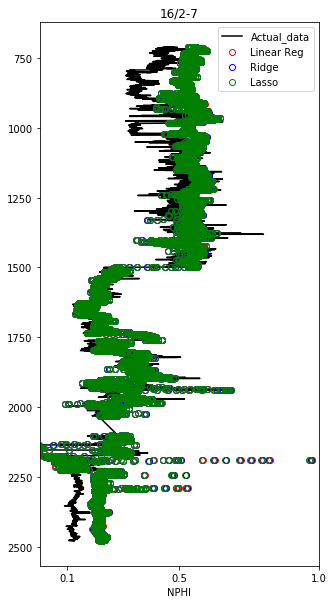

In [40]:
# NPHI track
fig, ax = plt.subplots(figsize=(5,10))
ax.set_title(well_to_plot)

#Actual Data
ax.plot(plot_df['NPHI'], plot_df['DEPTH_MD'], color ='black', linewidth=1.5, label = 'Actual_data')

#Plot Data
ax.plot(plot_df["NPHI_LinearReg"], plot_df['DEPTH_MD'], color = "red", marker='o', fillstyle ='none', ls='', label = 'Linear Reg')
ax.plot(plot_df["NPHI_Ridge"], plot_df['DEPTH_MD'], color = "blue", marker='o', fillstyle ='none', ls='', label = 'Ridge')
ax.plot(plot_df["NPHI_Lasso"], plot_df['DEPTH_MD'], color = "green", marker='o', fillstyle ='none', ls='', label = 'Lasso')

ax.set_xlabel("NPHI")
ax.invert_yaxis()
ax.set_xlim(0, 1)
ax.xaxis.label.set_color("black")
ax.tick_params(axis='x', colors="black")
ax.spines["top"].set_edgecolor("black")
ax.set_xticks([0.1, 0.5, 1])
ax.legend()

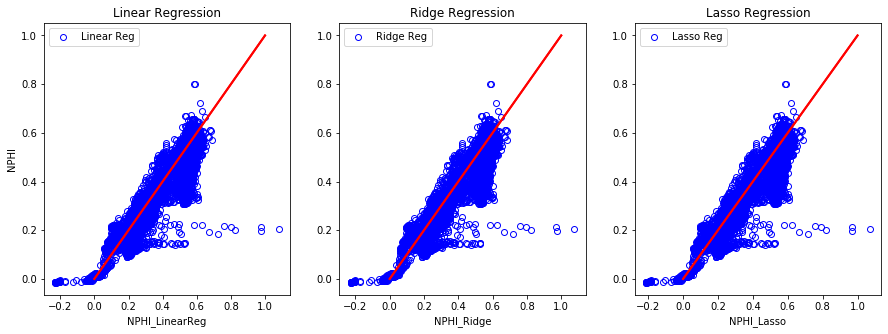

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))

ax1.set_title('Linear Regression')
ax1.plot(plot_df["NPHI_LinearReg"], plot_df['NPHI'], color = "blue", marker='o', fillstyle ='none', ls='', label = 'Linear Reg')
ax1.plot(np.array([[0,0], [1,1]]), color='red', linewidth = '2')
ax1.set_ylabel("NPHI")
ax1.set_xlabel("NPHI_LinearReg")
ax1.legend()

ax2.set_title('Ridge Regression')
ax2.plot(plot_df["NPHI_Ridge"], plot_df['NPHI'], color = "blue", marker='o', fillstyle ='none', ls='', label = 'Ridge Reg')
ax2.plot(np.array([[0,0], [1,1]]), color='red', linewidth = '2')
ax2.set_xlabel("NPHI_Ridge")
ax2.legend()

ax3.set_title('Lasso Regression')
ax3.plot(plot_df["NPHI_Lasso"], plot_df['NPHI'], color = "blue", marker='o', fillstyle ='none', ls='', label = 'Lasso Reg')
ax3.plot(np.array([[0,0], [1,1]]), color='red', linewidth = '2')
ax3.set_xlabel("NPHI_Lasso")
ax3.legend()